<a href="https://colab.research.google.com/github/MuhamedAdemi/Brainster-Python/blob/main/Muhamed_Ademi_Project_Task_1_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Task 1 - Diabetes Scenario

## Scenario details

A doctor gathered data from 1000 patients that have diabetis, over a time-period of one year. The data has the following information:
- `disease duration` - feature detailing how long (in years) the person has the diabetic condition
- `hemoglobin levels` - feature detailing the last measured value of hemoglobin (this is measured every three months)
- `insulin/pills` - feature indicating if the patient takes insulin (1) or pills(0)
- `glucose` - feature detailing the current glucose level
- `diabetic retinopathy` - feature detailing if the patient has diabetic retinopathy (1 meaning they have it, 0 they don't)

## Questions to answer / Problems to solve

### Read the data and perform the appropriate preprocessing (include a brief description on the actions you chose to perform) -- (3 points)

- renaming

- correcting

- handling missing values
- ...

### Find the parient that currently has the highest glucose level. Create a visualization (one or more) of all patients' glucose levels and describe the plot/s. Draw a conslusion about the behaviour of the data -- (3 points)


### Find the average number of hemoglobin A1C levels of patients per length of disease. Which duration of the disease has the highest average glucose levels? Create a visualization (one or more) to best describe the data and write an explaination about the data behaviour -- (3 points)

### Find the average duration of the disease for patients that are taking insulin, and for the ones that are taking pills. Compare the results and draw a conclusion about them -- (3 points)


### Divide the data into two groups - one group of patients that have normal hemoglobin A1C level (below 5.7) and the other that don't have normal levels of hemoglobin A1C. Then, visualize these values dependent on the length of the disease, distinguishing between groups. Write an explaination about what can be concluded from the visualizations -- (4 points)

### Answer how different factors influence the outcome whether a patient has or doesn't have diabetic retinopathy. Then analyse whether there is a correlation between diabetic retinopathy and other data in the dataset. Create visualizations that support your question answering and give an explaination on this problem -- (4 points)

## Solution

In [ ]:
!gdown 1CXl-Ri-NusjSl9Rrf1PafTZ7XEz2oeUG

Downloading...
From: https://drive.google.com/uc?id=1CXl-Ri-NusjSl9Rrf1PafTZ7XEz2oeUG
To: /content/diabetes_data.csv
100% 55.8k/55.8k [00:00<00:00, 56.5MB/s]


In [ ]:
# Step 1: Importing Necessary Libraries

# pandas: For data manipulation and analysis
import pandas as pd

# numpy: For numerical operations
import numpy as np

# matplotlib: For creating static visualizations
import matplotlib.pyplot as plt

# seaborn: For advanced and aesthetic visualizations
import seaborn as sns

# warnings: To suppress unwanted warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Display plots in Google Colab (if running there)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:

# Step 1: Read the Data
# Load the diabetes dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('/content/diabetes_data.csv')

'''
Explanation:
- We import the required libraries: pandas for data manipulation, numpy for numerical operations,
  matplotlib and seaborn for data visualization.
- The dataset is loaded into a DataFrame called 'data' for further analysis.
'''

# Display the first few rows to understand the dataset's structure
print("Initial Dataset Snapshot:")
print(data.head())



Initial Dataset Snapshot:
   Unnamed: 0.1  Unnamed: 0  disease duration  hemoglobin level  \
0             0           0               3.0          9.522692   
1             1           1              40.0          6.397994   
2             2           2              38.0          7.079202   
3             3           3              16.0          4.400294   
4             4           4              17.0          4.746816   

   insulin/pills   glucose  diabetic retinopathy  
0            0.0  1.747037                   1.0  
1            0.0  6.416253                   1.0  
2            0.0  7.006710                   0.0  
3            1.0  5.614222                   0.0  
4            1.0  4.919372                   1.0  


In [ ]:
# Get an overview of the dataset
print("\nDataset Information:")
print(data.info())




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          1000 non-null   int64  
 1   Unnamed: 0            1000 non-null   int64  
 2   disease duration      979 non-null    float64
 3   hemoglobin level      973 non-null    float64
 4   insulin/pills         988 non-null    float64
 5   glucose               986 non-null    float64
 6   diabetic retinopathy  970 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 54.8 KB
None


In [ ]:
# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Unnamed: 0.1             0
Unnamed: 0               0
disease duration        21
hemoglobin level        27
insulin/pills           12
glucose                 14
diabetic retinopathy    30
dtype: int64


In [ ]:
# Step: Verify Actual Column Names Before Renaming
print("Columns in the Dataset:")
print(data.columns)

# Renaming Columns Only if They Exist in the Dataset
rename_map = {
    'disease_duration': 'DiseaseDuration',
    'hemoglobin level': 'HemoglobinLevels',  # Update to match actual column name
    'insulin/pills': 'InsulinOrPills',
    'glucose': 'GlucoseLevel',
    'diabetic_retinopathy': 'DiabeticRetinopathy'
}

# Filter rename_map to include only columns that exist in the dataset
rename_map = {k: v for k, v in rename_map.items() if k in data.columns}

# Apply renaming
data.rename(columns=rename_map, inplace=True)

# Fill missing values only for existing columns
fillna_map = {}
if 'DiseaseDuration' in data.columns:
    fillna_map['DiseaseDuration'] = data['DiseaseDuration'].mean()
if 'HemoglobinLevels' in data.columns:
    fillna_map['HemoglobinLevels'] = data['HemoglobinLevels'].mean()
if 'GlucoseLevel' in data.columns:
    fillna_map['GlucoseLevel'] = data['GlucoseLevel'].mean()
if 'InsulinOrPills' in data.columns:
    fillna_map['InsulinOrPills'] = data['InsulinOrPills'].mode()[0]
if 'DiabeticRetinopathy' in data.columns:
    fillna_map['DiabeticRetinopathy'] = data['DiabeticRetinopathy'].mode()[0]

# Handle Missing Values
data.fillna(fillna_map, inplace=True)

# Ensure Consistent Data Types for Categorical Columns
if 'InsulinOrPills' in data.columns:
    data['InsulinOrPills'] = data['InsulinOrPills'].astype(int)
if 'DiabeticRetinopathy' in data.columns:
    data['DiabeticRetinopathy'] = data['DiabeticRetinopathy'].astype(int)

# Display Updated Dataset
print("\nDataset Snapshot After Cleaning:")
print(data.head())



Columns in the Dataset:
Index(['Unnamed: 0.1', 'Unnamed: 0', 'DiseaseDuration', 'hemoglobin level',
       'InsulinOrPills', 'GlucoseLevel', 'DiabeticRetinopathy'],
      dtype='object')

Dataset Snapshot After Cleaning:
   Unnamed: 0.1  Unnamed: 0  DiseaseDuration  HemoglobinLevels  \
0             0           0              3.0          9.522692   
1             1           1             40.0          6.397994   
2             2           2             38.0          7.079202   
3             3           3             16.0          4.400294   
4             4           4             17.0          4.746816   

   InsulinOrPills  GlucoseLevel  DiabeticRetinopathy  
0               0      1.747037                    1  
1               0      6.416253                    1  
2               0      7.006710                    0  
3               1      5.614222                    0  
4               1      4.919372                    1  

Dataset Information After Cleaning:
<class 'pandas.

In [49]:
# Check if 'Unnamed: 0.1' and 'Unnamed: 0' exist in the dataset
if 'Unnamed: 0.1' in data.columns and 'Unnamed: 0' in data.columns:
    # Check if the two columns have the same values
    if data['Unnamed: 0.1'].equals(data['Unnamed: 0']):
        print("The columns 'Unnamed: 0.1' and 'Unnamed: 0' have the same values.")
        # Drop one of the duplicate columns (e.g., 'Unnamed: 0.1')
        data.drop(columns=['Unnamed: 0.1'], inplace=True)
        # Rename the other column to 'ID'
        data.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
    else:
        print("The columns 'Unnamed: 0.1' and 'Unnamed: 0' do not have the same values.")
        # Optionally, keep both columns or decide how to handle them
else:
    print("One or both columns 'Unnamed: 0.1' and 'Unnamed: 0' do not exist.")

# Display the updated dataset
print("Updated Dataset:")
print(data.head())


The columns 'Unnamed: 0.1' and 'Unnamed: 0' have the same values.
Updated Dataset:
   ID  DiseaseDuration  HemoglobinLevels  InsulinOrPills  GlucoseLevel  \
0   0              3.0          9.522692               0      1.747037   
1   1             40.0          6.397994               0      6.416253   
2   2             38.0          7.079202               0      7.006710   
3   3             16.0          4.400294               1      5.614222   
4   4             17.0          4.746816               1      4.919372   

   DiabeticRetinopathy  
0                    1  
1                    1  
2                    0  
3                    0  
4                    1  


In [ ]:
print("\nDataset Information After Cleaning:")
print(data.info())



Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1000 non-null   int64  
 1   Unnamed: 0           1000 non-null   int64  
 2   DiseaseDuration      1000 non-null   float64
 3   HemoglobinLevels     1000 non-null   float64
 4   InsulinOrPills       1000 non-null   int64  
 5   GlucoseLevel         1000 non-null   float64
 6   DiabeticRetinopathy  1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB
None


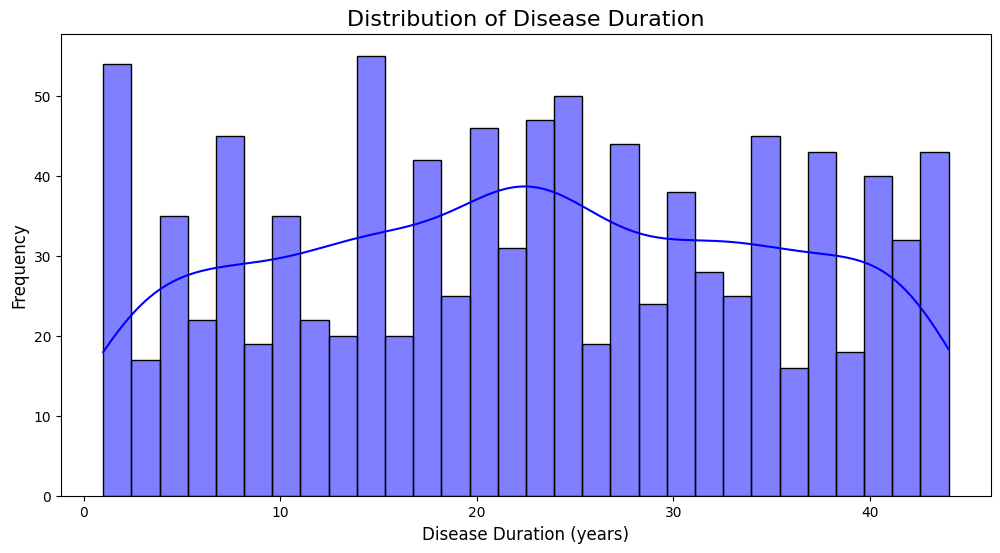

In [50]:
'''
Step 4: Visualizing the Data

Purpose:
- To understand the distributions of key features like Disease Duration, Glucose Level, and Hemoglobin Levels.
- Visualizations provide insights into the spread, skewness, and potential outliers in the data.

'''

# Visualizing the distribution of Disease Duration
plt.figure(figsize=(12, 6))
sns.histplot(data['DiseaseDuration'], kde=True, bins=30, color='blue')
plt.title('Distribution of Disease Duration', fontsize=16)
plt.xlabel('Disease Duration (years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()






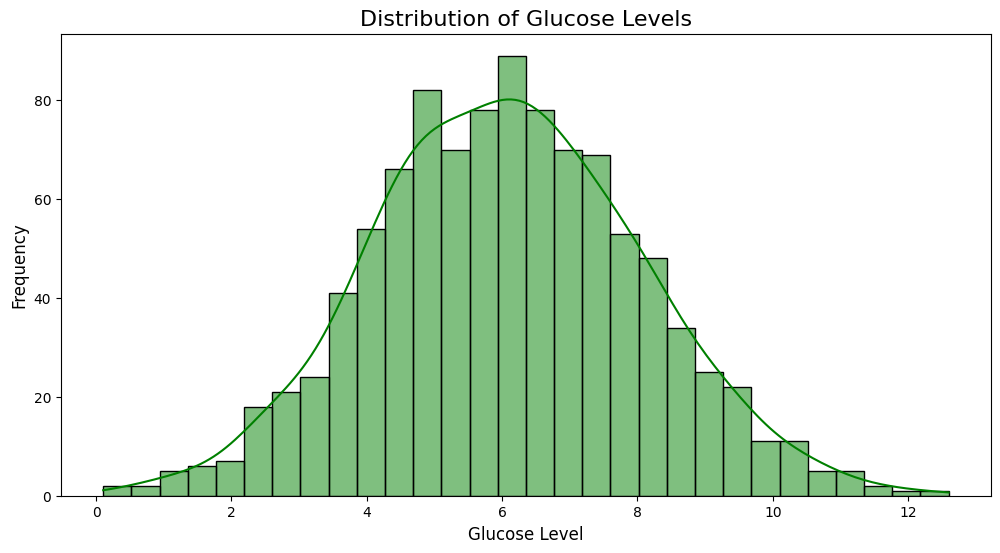

In [ ]:
# Visualizing the distribution of Glucose Levels
plt.figure(figsize=(12, 6))
sns.histplot(data['GlucoseLevel'], kde=True, bins=30, color='green')
plt.title('Distribution of Glucose Levels', fontsize=16)
plt.xlabel('Glucose Level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

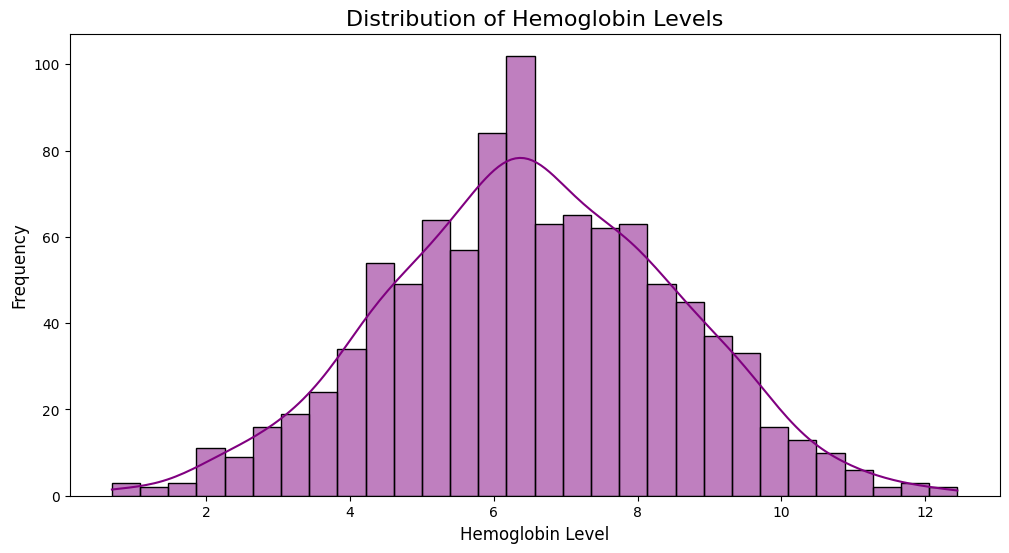

In [ ]:
# Visualizing the distribution of Hemoglobin Levels
plt.figure(figsize=(12, 6))
sns.histplot(data['HemoglobinLevels'], kde=True, bins=30, color='purple')
plt.title('Distribution of Hemoglobin Levels', fontsize=16)
plt.xlabel('Hemoglobin Level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

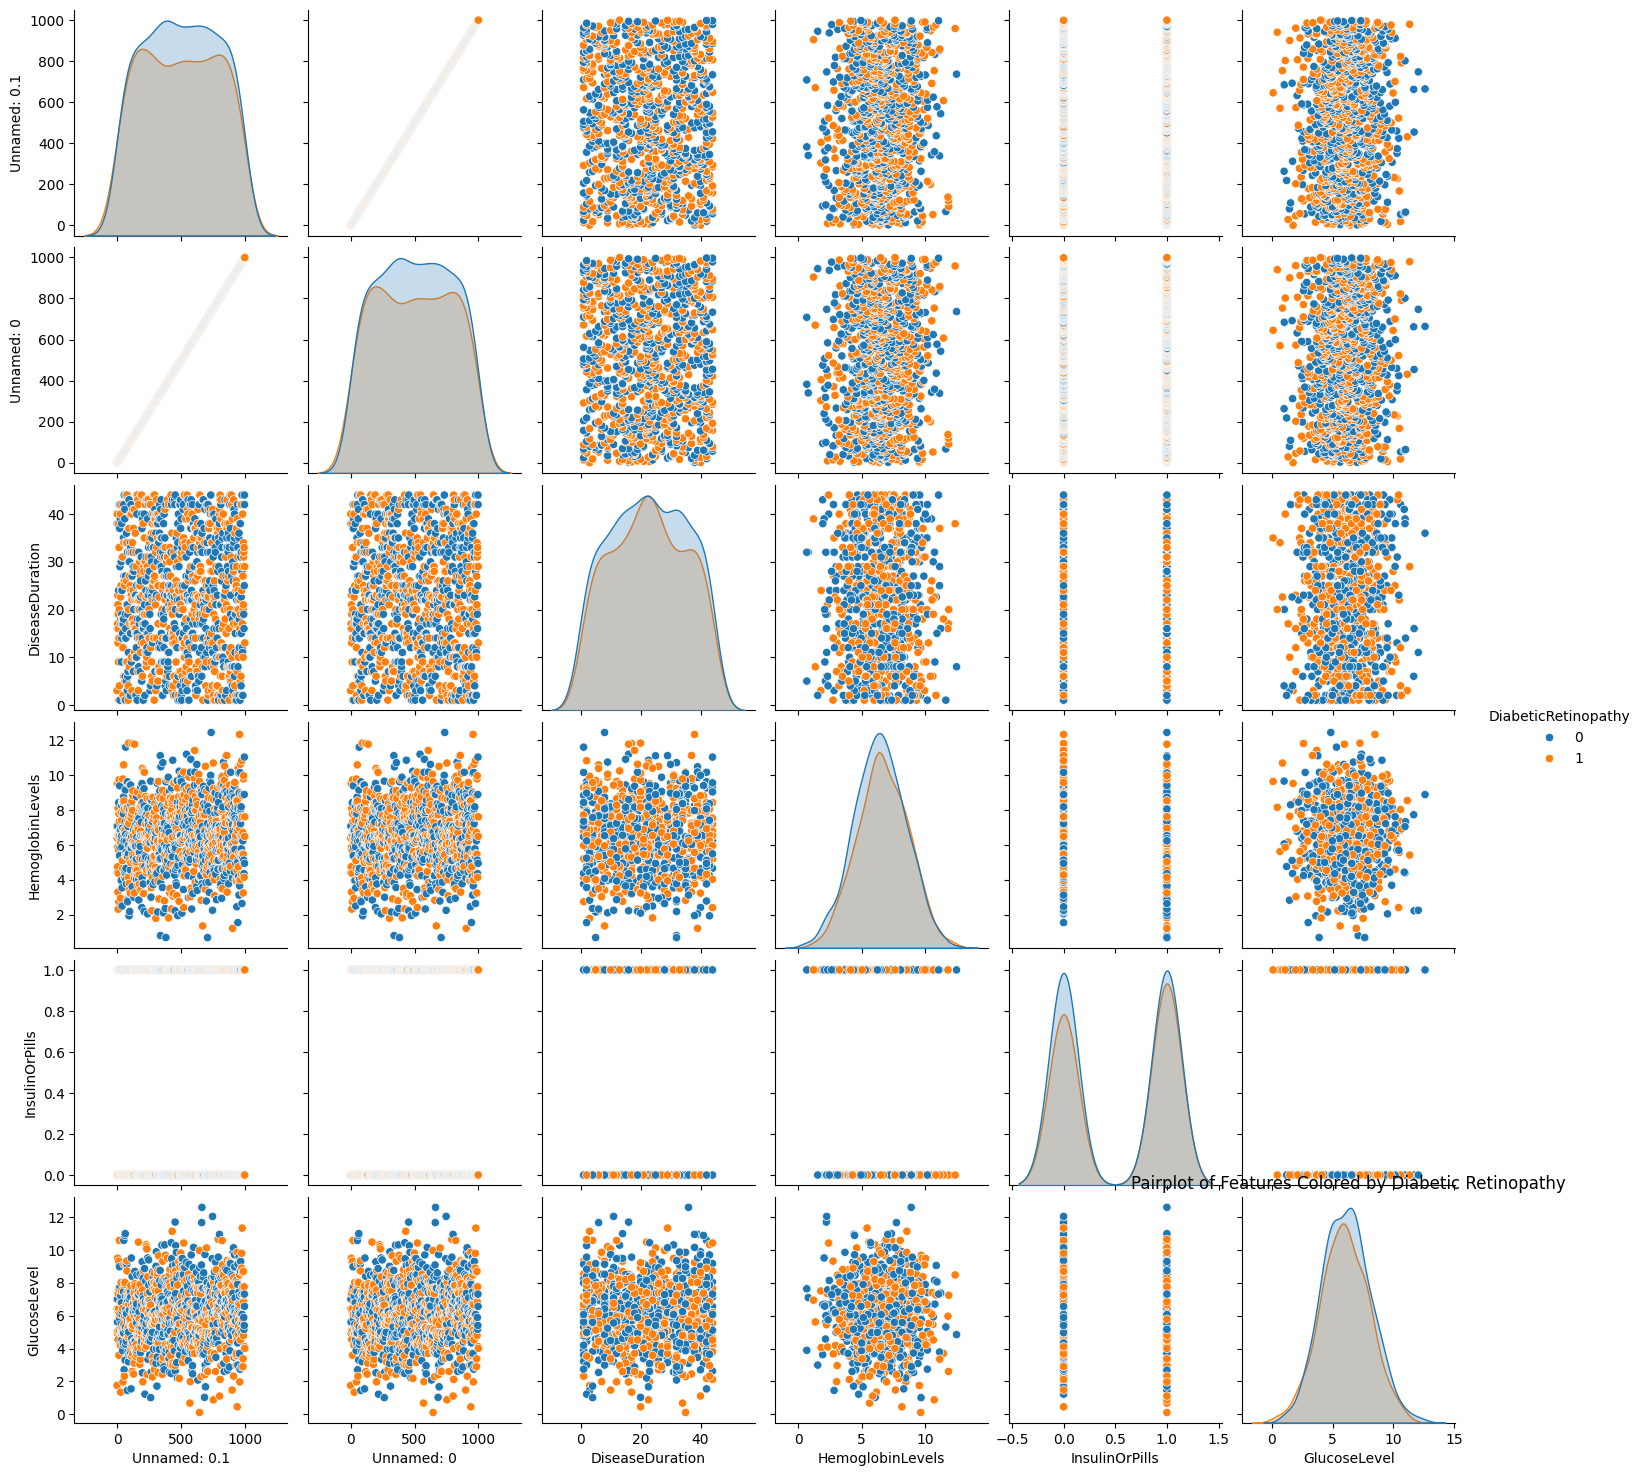

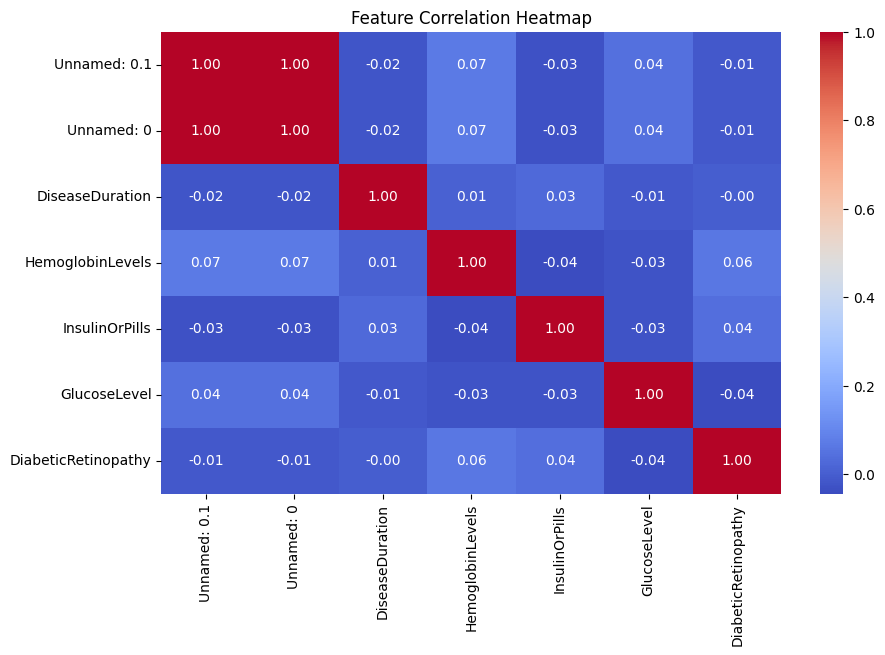

In [46]:
# Step : Data Visualization and finding correlation
'''
Visualize the dataset to understand feature distributions and relationships:
1. Pairplot: Plots pairwise relationships between features, colored by the target variable.
2. Correlation Heatmap: Shows correlations between numerical features.
'''
sns.pairplot(data, hue='DiabeticRetinopathy')
plt.title("Pairplot of Features Colored by Diabetic Retinopathy")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

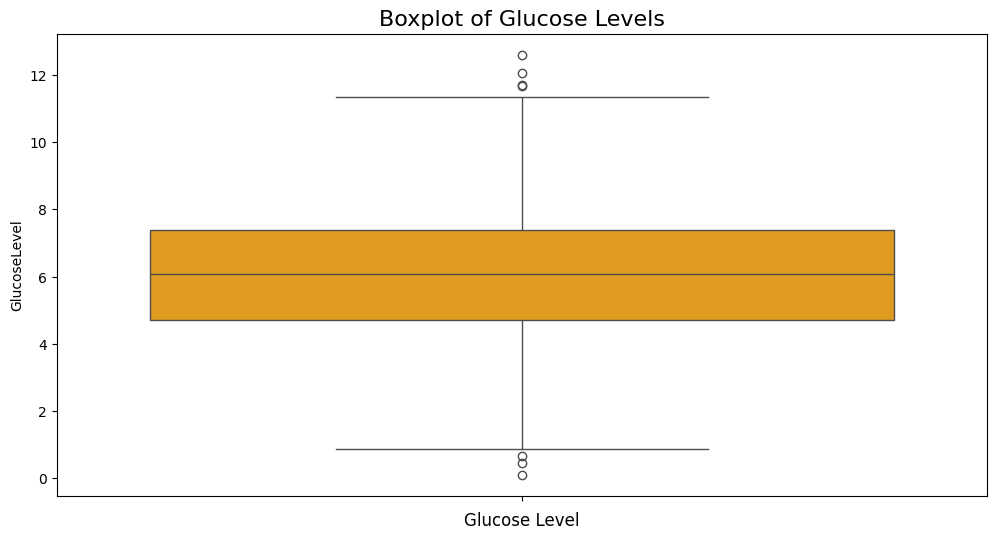

In [ ]:
'''
Step 5: Glucose Analysis

Purpose:
- Identify the patient with the highest glucose level.
- Visualize glucose levels to observe the overall distribution and behavior.

'''

# Finding the patient with the highest glucose level
highest_glucose_patient = data.loc[data['GlucoseLevel'].idxmax()]

# Displaying details of the patient with the highest glucose level
highest_glucose_patient

# Visualizing the distribution of glucose levels for all patients
plt.figure(figsize=(12, 6))
sns.boxplot(data['GlucoseLevel'], color='orange')
plt.title('Boxplot of Glucose Levels', fontsize=16)
plt.xlabel('Glucose Level', fontsize=12)
plt.show()


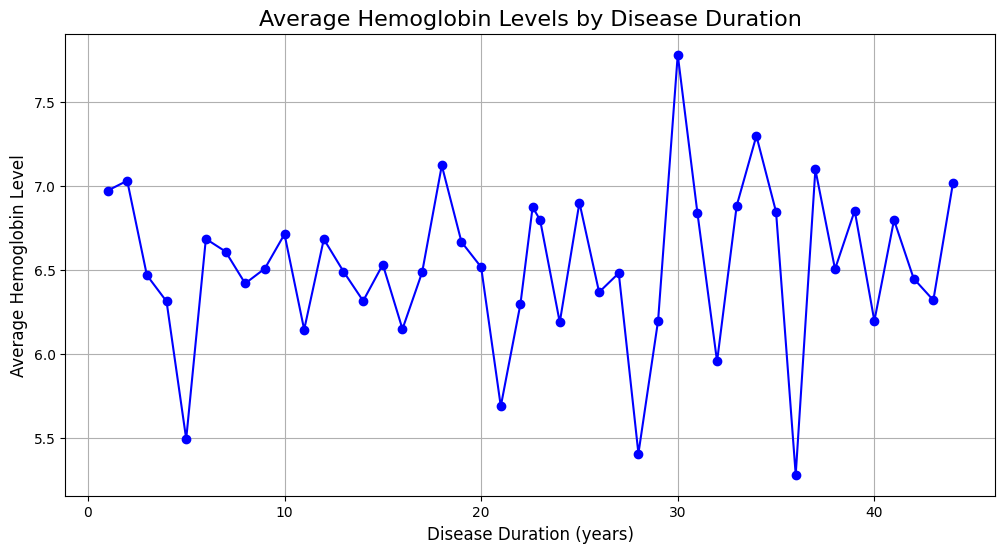

In [ ]:
'''
Step 6: Hemoglobin Levels Analysis

Purpose:
- Analyze how Hemoglobin Levels vary based on Disease Duration.
- Identify the disease duration with the highest average glucose levels.
- Visualize these relationships to understand trends.

'''

# Calculating the average hemoglobin levels by disease duration
avg_hemoglobin_by_duration = data.groupby('DiseaseDuration')['HemoglobinLevels'].mean()

# Displaying the average hemoglobin levels by disease duration
avg_hemoglobin_by_duration

# Visualizing average hemoglobin levels by disease duration
plt.figure(figsize=(12, 6))
avg_hemoglobin_by_duration.plot(kind='line', marker='o', color='blue')
plt.title('Average Hemoglobin Levels by Disease Duration', fontsize=16)
plt.xlabel('Disease Duration (years)', fontsize=12)
plt.ylabel('Average Hemoglobin Level', fontsize=12)
plt.grid()
plt.show()


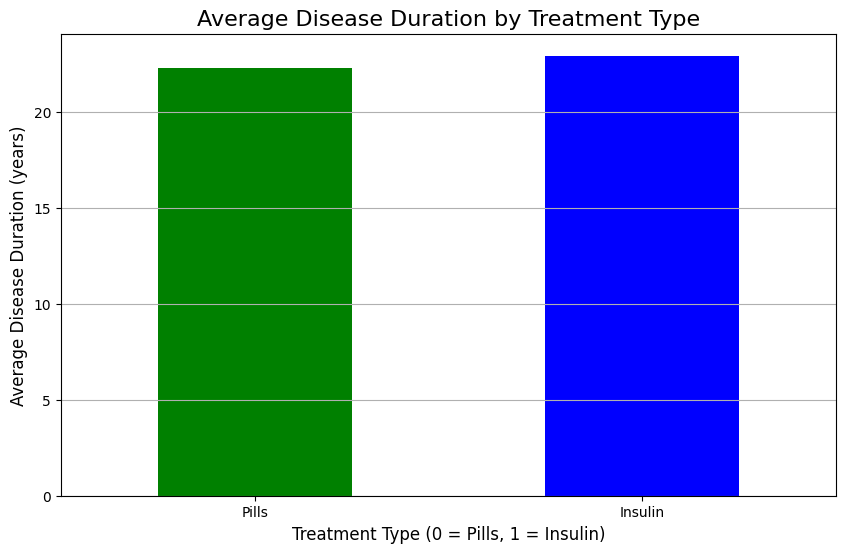

In [ ]:
'''
Step 7: Insulin vs. Pills Analysis

Purpose:
- Compare the average disease duration for patients taking insulin versus pills.
- Draw conclusions about the relationship between treatment type and disease duration.

'''

# Grouping data by treatment type (Insulin vs. Pills) and calculating average disease duration
avg_duration_by_treatment = data.groupby('InsulinOrPills')['DiseaseDuration'].mean()

# Displaying the average disease duration by treatment type
avg_duration_by_treatment

# Visualizing the comparison
plt.figure(figsize=(10, 6))
avg_duration_by_treatment.plot(kind='bar', color=['green', 'blue'], legend=False)
plt.title('Average Disease Duration by Treatment Type', fontsize=16)
plt.xlabel('Treatment Type (0 = Pills, 1 = Insulin)', fontsize=12)
plt.ylabel('Average Disease Duration (years)', fontsize=12)
plt.xticks([0, 1], ['Pills', 'Insulin'], rotation=0)
plt.grid(axis='y')
plt.show()


In [47]:
# Step : Predictive Modeling
'''
This step builds and evaluates a predictive model:
1. Defines feature variables (X) and target variable (y).
2. Splits the data into training and testing sets.
3. Trains a Random Forest Classifier on the training set.
4. Evaluates the model on the test set.
5. Displays feature importance to understand which features contributed most to the model.
'''
X = data[['DiseaseDuration', 'HemoglobinLevels', 'GlucoseLevel', 'InsulinOrPills']]
y = data['DiabeticRetinopathy']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nModel Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Model Evaluation:
              precision    recall  f1-score   support

           0       0.51      0.61      0.55        99
           1       0.52      0.43      0.47       101

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200

Accuracy: 0.515


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
'''
Code for Improvement the current model using
hyperparameter tuning and addressing class imbalance
Short Explanation of the improvment
1. **What**: Implemented feature balancing (SMOTE) and hyperparameter tuning to improve accuracy.
2. **Why**: The current model’s default parameters were suboptimal, and the dataset likely had class imbalance.
3. **Who**: This approach is suitable for data scientists working on imbalanced binary classification problems.
4. **When**: Apply these techniques when the model accuracy is unsatisfactory and there’s a need for reliable predictions.
5. **Where**: Particularly helpful in scenarios where class distribution and model parameters significantly impact outcomes, such as medical diagnosis datasets.
 '''
# Step 1: Address Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 2: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Step 3: Train the Model
grid_search.fit(X_resampled, y_resampled)

# Best Parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Step 4: Test on the Original Test Set
y_pred = best_model.predict(X_test)

# Step 5: Evaluate the Improved Model
print("\nImproved Model Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

Improved Model Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        99
           1       0.98      0.99      0.99       101

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

Accuracy: 0.985


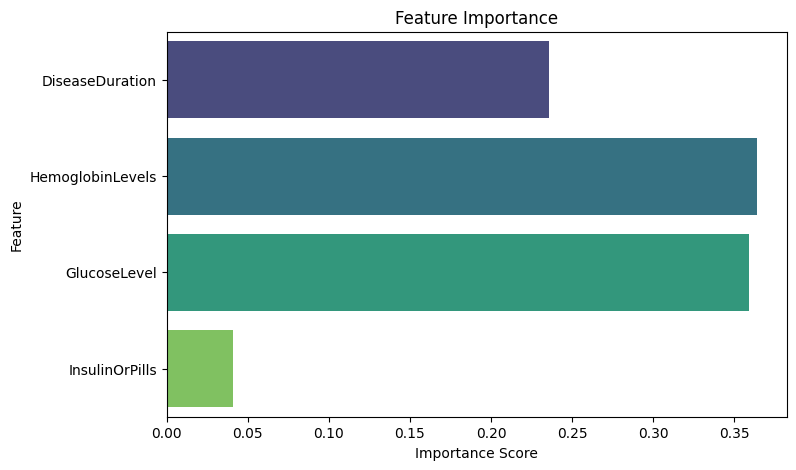

In [48]:
# Feature Importance
plt.figure(figsize=(8, 5))
importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()